In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pickle

In [30]:
curve = pickle.load(open("../data/trajs/curve.pkl",'rb'))
start = (curve[0][0], curve[1][0])
goal = (curve[0][-1], curve[1][-1])

In [46]:
class DMP:
    def __init__(self, num_bfs = 5):
        self.num_bfs = num_bfs     # num of basis functions
        self.K = 25*25/4     # Spring coefficient
        self.B = 25          # damper coefficient
        self.C = np.linspace(0, 1, self.num_bfs)    # num of basis fn centers
        self.H = 0.65*(1/(self.num_bfs - 1))**2      # bf widths
        
        self.weights = [0, 0, 0, 0, 0]
        self.start = self.goal = self.T = 0
        self.q = self.qd = self.qdd = 0
        
    def set_task_params(self, start, goal, T, dt):
        self.dt = dt
        self.start = start
        self.goal = goal
        self.T = T
        self.q = self.start
        self.qd = self.qdd = 0
        
    def fwd_simulate(self, horizon, weights):
        t = 0
        pos = []
        for i in range(horizon):
            t += self.dt
            if t <= self.T:
                phi = [np.exp(-((t/self.T - c)**2)/2*self.H) for c in self.C]
                phi /= np.sum(phi)
#                 print(phi)
                f = np.dot(phi, weights)
            else:
                f = 0
#             print(f)
            self.qdd = (self.K*(self.goal-self.q)/(self.T**2)) - self.B*self.qd/self.T + (self.goal-self.start)*f/(self.T**2)
#             print(self.qdd)
            self.qd += self.qdd * self.dt
            self.q += self.qd * self.dt
            pos.append(self.q)
        return np.array(pos)

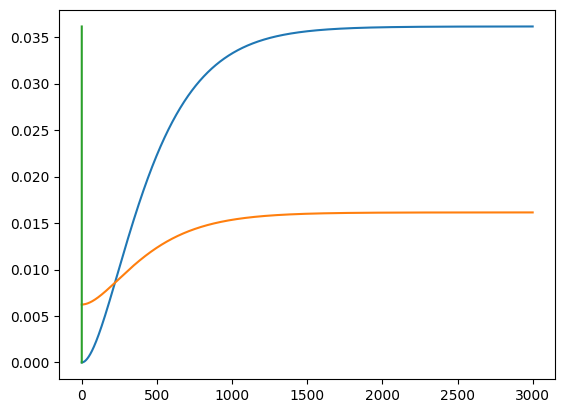

In [58]:
dmp = DMP()
dmp.set_task_params(start[0], goal[0], 3, 0.001)
pos_x = dmp.fwd_simulate(3000, 10*np.array([0,0,0,1,1]))
dmp.set_task_params(start[1], goal[1], 3, 0.001)
pos_y = dmp.fwd_simulate(3000, 10*np.array([0,0,0,1,1]))
plt.plot(pos_y)
plt.plot(pos_x)
_ = plt.plot(pos_x, pos_y)